In [15]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
koi = pd.read_csv('data/cumulative_2022.10.18_16.13.29.csv', skiprows=53)
pscd = pd.read_csv('data/PSCompPars_2022.10.18_16.13.33.csv', skiprows=88)

## Overall

In [4]:
# Length of datasets

len(koi), len(pscd)
print(f'koi: {len(koi)}, pcsd: {len(pscd)}.')
print(f'koi is{len(koi) / len(pscd): .2f} times longer')

koi: 9564, pcsd: 5187.
koi is 1.84 times longer


### Do the datasets correspond

In [5]:
pos_cols = ['ra', 'dec']

display(koi[pos_cols].describe())
pscd[pos_cols].describe()

,ra,dec
count,9564.000000,9564.000000
mean,292.060163,43.810433
std,4.766657,3.601243
min,279.852720,36.577381
25%,288.660770,40.777173
50%,292.261125,43.677504
75%,295.859160,46.714611
max,301.720760,52.336010


,ra,dec
count,5187.000000,5187.000000
mean,238.995718,20.788677
std,89.338069,34.770978
min,0.185606,-88.121111
25%,186.876046,-4.625442
50%,286.585412,40.291889
75%,293.727615,45.501070
max,359.974984,85.736533


In [6]:
ra_mask = (pscd['ra'] <= koi['ra'].max()) & ((pscd['ra'] >= koi['ra'].min()))
dec_mask =(pscd['dec'] <= koi['dec'].max()) & ((pscd['dec'] >= koi['dec'].min())) 

len(pscd[ra_mask & dec_mask]) / len(pscd)

0.5276653171390013

### Do the datasets include habitable planets?

In [7]:
# Definition
#   - Mass: 0.1-10 EM
#   - Radius: 0.5-2.5 Earth radius
#   - Eq Temp: 175-270 Kelvin

temp_min, temp_max = 175, 270
mass_min, mass_max = 1, 10
radius_min, radius_max = 0.5, 2.5

In [8]:
def find_habitable(data, mass_col=None, radius_col=None, temp_col=None):
    mass_mask = True
    if mass_col:
        mass_mask = (data[mass_col] >= 0.1) & (data[mass_col] <= 10)
        print(f'Mass match: {len(data[mass_mask]) / len(data) * 100:.2f}%')

    radius_mask = True
    if radius_col:
        radius_mask = (data[radius_col] >= 0.5) & (data[radius_col] <= 2.5)
        print(f'Radius match: {len(data[radius_mask]) / len(data) * 100:.2f}%')

    temp_mask = True
    if temp_col:
        temp_mask = (data[temp_col] >= 182) & (data[temp_col] <= 285)
        print(f'Temp match: {len(data[temp_mask]) / len(data) * 100:.2f}%')


    habitable =  data[mass_mask & radius_mask & temp_mask]
    print(f'{len(habitable)} total habitable planets found')

    return habitable

In [9]:
pscd_habitable = find_habitable(pscd, 'pl_bmasse', 'pl_rade', 'pl_eqt')
pscd_habitable.head()

Mass match: 54.69%
Radius match: 44.05%
Temp match: 1.52%
33 total habitable planets found


,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,pl_orbsmaxerr2,pl_orbsmaxlim,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radj,pl_radjerr1,pl_radjerr2,pl_radjlim,pl_bmasse,pl_bmasseerr1,pl_bmasseerr2,pl_bmasselim,pl_bmassj,pl_bmassjerr1,pl_bmassjerr2,pl_bmassjlim,pl_bmassprov,pl_orbeccen,pl_orbeccenerr1,pl_orbeccenerr2,pl_orbeccenlim,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,ttv_flag,st_spectype,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_rad,st_raderr1,st_raderr2,st_radlim,st_mass,st_masserr1,st_masserr2,st_masslim,st_met,st_meterr1,st_meterr2,st_metlim,st_metratio,st_logg,st_loggerr1,st_loggerr2,st_logglim,rastr,ra,decstr,dec,sy_dist,sy_disterr1,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
229,GJ 357 d,GJ 357,1,3,Radial Velocity,2019,Multiple Observatories,0,55.661000,0.055000,-0.055000,0.0,0.2040,0.0150,-0.0150,0.0,2.34,NaN,NaN,0.0,0.209,NaN,NaN,0.0,6.10000,1.0,-1.0,0.0,0.01919,0.00315,-0.00315,0.0,Msini,NaN,NaN,NaN,NaN,0.38,0.01,-0.01,0.0,220.0,6.0,-6.0,0.0,0,M2.5 V,3505.0,51.0,-51.0,0.0,0.34,0.02,-0.02,0.0,0.34,0.01,-0.01,0.0,-0.12,0.16,-0.16,0.0,[Fe/H],4.94,0.07,-0.07,0.0,09h36m01.79s,144.007464,-21d39m54.23s,-21.665063,9.44181,0.005110,-0.005110,10.910,0.100,-0.100,6.475,0.017,-0.017,9.88036,0.001440,-0.001440
251,GJ 514 b,GJ 514,1,1,Radial Velocity,2022,Multiple Observatories,0,140.430000,0.410000,-0.410000,0.0,0.4220,0.0140,-0.0150,0.0,2.13,NaN,NaN,0.0,0.190,NaN,NaN,0.0,5.20000,0.9,-0.9,0.0,0.01636,0.00283,-0.00283,0.0,Msini,0.45,0.15,-0.14,0.0,0.28,0.07,-0.06,0.0,202.0,11.0,-11.0,0.0,0,M0.5-1.0 V,3728.0,68.0,-68.0,0.0,0.50,0.05,-0.05,0.0,0.51,0.05,-0.05,0.0,-0.14,0.09,-0.09,0.0,[Fe/H],4.76,0.04,-0.04,0.0,13h30m00.97s,202.504042,+10d22m21.14s,10.372539,7.61778,0.003175,-0.003175,9.050,0.100,-0.100,5.036,0.027,-0.027,8.20621,0.000711,-0.000711
1361,K2-18 b,K2-18,1,2,Transit,2015,K2,0,32.939623,0.000095,-0.000100,0.0,0.1429,0.0060,-0.0065,0.0,2.37,0.22,-0.22,0.0,0.211,0.020,-0.020,0.0,8.92000,1.7,-1.6,0.0,0.02807,0.00535,-0.00503,0.0,Mass,0.20,0.08,-0.08,0.0,1.01,0.08,-0.08,0.0,284.0,15.0,-15.0,0.0,0,M2.5 V,3457.0,39.0,-39.0,0.0,0.41,0.04,-0.04,0.0,0.36,0.05,-0.05,0.0,0.12,0.16,-0.16,0.0,[Fe/H],4.79,0.01,-0.01,0.0,11h30m14.43s,172.560141,+07d35m16.19s,7.587832,38.02660,0.079550,-0.079550,13.477,0.042,-0.042,8.899,0.019,-0.019,12.41540,0.000502,-0.000502
1518,K2-288 B b,K2-288 B,2,1,Transit,2018,K2,0,31.393463,0.000067,-0.000069,0.0,0.1640,0.0300,-0.0300,0.0,1.90,0.30,-0.30,0.0,0.170,0.027,-0.027,0.0,4.27000,NaN,NaN,0.0,0.01340,NaN,NaN,0.0,M-R relationship,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226.0,22.0,-22.0,0.0,0,M3 V,3341.0,276.0,-276.0,0.0,0.32,0.03,-0.03,0.0,0.33,0.02,-0.02,0.0,-0.21,0.09,-0.09,0.0,[Fe/H],4.96,0.02,-0.02,0.0,03h41m46.63s,55.444286,+18d16m06.57s,18.268491,65.61380,0.882100,-0.859400,13.868,0.120,NaN,9.724,0.018,NaN,14.54510,0.001737,-0.001737
1530,K2-3 d,K2-3,1,3,Transit,2015,K2,0,44.556460,0.000110,-0.000100,0.0,0.2097,0.0065,-0.0070,0.0,1.53,0.11,-0.11,0.0,0.136,0.010,-0.010,0.0,2.80007,NaN,NaN,1.0,0.00881,NaN,NaN,1.0,Mass,0.00,NaN,NaN,0.0,0.80,0.24,-0.24,0.0,282.0,24.0,-24.0,0.0,0,M0.0&plusmn0.5 V,3896.0,189.0,-189.0,0.0,0.56,0.07,-0.07,0.0,0.60,0.09,-0.09,0.0,-0.32,0.13,-0.13,0.0,[Fe/H],4.73,0.06,-0.06,0.0,11h29m20.49s,172.335371,-01d27m18.49s,-1.455136,44.07270,0.108150,-0.108150,12.168,0.009,-0.009,8.561,0.023,-0.023,11.47850,0.000959,-0.000959


In [10]:
koi_habitable = find_habitable(koi, radius_col='koi_prad', temp_col='koi_teq').head()
koi_habitable.head()

Radius match: 49.41%
Temp match: 6.40%
372 total habitable planets found


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
86,4139816,K00812.03,Kepler-235 e,CONFIRMED,CANDIDATE,1.000,0,0,0,0,46.184204,0.000265,-0.000265,165.23729,0.00430,-0.00430,0.013,0.415,-0.013,4.7580,0.1300,-0.1300,1394.7,56.4,-56.4,1.83,0.12,-0.15,273.0,NaN,NaN,1.32,0.29,-0.30,26.0,3.0,q1_q17_dr25_tce,3950.0,70.0,-86.0,4.754,0.042,-0.031,0.493,0.033,-0.040,286.07913,39.278320,15.954
170,6435936,K00854.01,Kepler-705 b,CONFIRMED,CANDIDATE,0.996,0,0,0,0,56.056075,0.000275,-0.000275,201.16578,0.00329,-0.00329,0.018,0.413,-0.018,4.6850,0.1320,-0.1320,1626.0,66.7,-66.7,1.94,0.12,-0.22,233.0,NaN,NaN,0.69,0.15,-0.19,27.4,1.0,q1_q17_dr25_tce,3593.0,71.0,-86.0,4.757,0.054,-0.027,0.491,0.030,-0.055,289.50848,41.812119,15.849
667,6960913,K01361.01,Kepler-61 b,CONFIRMED,CANDIDATE,0.998,0,0,0,0,59.878026,0.000150,-0.000150,151.18470,0.00210,-0.00210,0.004,0.411,-0.004,4.8027,0.0705,-0.0705,1419.1,32.3,-32.3,2.19,0.08,-0.14,273.0,NaN,NaN,1.31,0.22,-0.24,51.8,1.0,q1_q17_dr25_tce,4016.0,79.0,-79.0,4.658,0.039,-0.015,0.599,0.023,-0.037,295.30450,42.475288,14.995
987,10604335,K01298.02,Kepler-283 c,CONFIRMED,CANDIDATE,0.000,0,0,0,0,92.749578,0.000694,-0.000694,173.27975,0.00543,-0.00543,0.019,0.422,-0.019,5.5060,0.1910,-0.1910,1105.1,65.1,-65.1,1.87,0.08,-0.10,240.0,NaN,NaN,0.78,0.15,-0.14,18.0,2.0,q1_q17_dr25_tce,4141.0,83.0,-91.0,4.684,0.022,-0.025,0.582,0.027,-0.030,293.61371,47.839001,15.847
1300,10027323,K01596.02,Kepler-309 c,CONFIRMED,CANDIDATE,0.738,0,0,0,0,105.358230,0.000525,-0.000525,138.68069,0.00327,-0.00327,0.750,0.196,-0.511,3.8100,0.1370,-0.1370,1210.2,56.1,-56.1,1.87,0.13,-0.17,204.0,NaN,NaN,0.41,0.09,-0.10,22.6,2.0,q1_q17_dr25_tce,3883.0,69.0,-93.0,4.762,0.040,-0.036,0.496,0.036,-0.044,297.50986,46.961262,15.157


## Plotting the objects

In [12]:
from astropy.coordinates import SkyCoord
import astropy.units as u

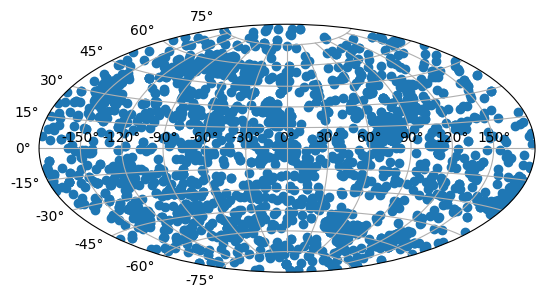

In [18]:
pos_cols = ['ra', 'dec']
koi_pos = koi[pos_cols]
koi_pos['type'] = 'KOI'
pscd_pos = pscd[pos_cols]
pscd_pos['type'] = 'PSCD'
all_objects = pd.concat([koi_pos, pscd_pos])

koi_eq = SkyCoord(koi['ra'], koi['dec'], unit=u.deg)
koi_gal = koi_eq.galactic

pscd_eq = SkyCoord(pscd['ra'], pscd['dec'], unit=u.deg)
pscd_gal = pscd_eq.galactic

plt.subplot(111, projection='aitoff')
plt.scatter(koi_gal.l.wrap_at('180d').radian, koi_gal.b.radian)
plt.scatter(pscd_gal.l.wrap_at('180d').radian, pscd_gal.b.radian, color='blue')